##JesseRuiz_Codeup_RegressionProject_2019


<h1>Zillow Zestimate</h1>

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

<h2>Prep Environment</h2>

In [1]:
import numpy as np
import pandas as pd

from numpy.random import randn



# Modeling
import statsmodels.api as sm
import scipy.stats as stats

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
mpl.style.use('classic')
%matplotlib inline

import math

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import statsmodels.api as sm

from pprint import pprint

<h1>Project Planning</h1> 


<p><ol><li>Your goal clearly stated. Why? So that when you get a bit lost, you can quickly refer to the goal and ask, "Is what I'm doing now the best use of my time to help me achieve my goal?"</li>
    <li>Your deliverables clearly stated, so you know when you are done! </li>
    <li>Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)</li>
    <li>Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within indepependent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.</li></ol></p>


<ol><li> <h4>Goal:</h4> to create a linear regression model to predict house sales price </li>
    <li> <h4>Deliverables:</h4> A report that tells the story of the Zestimate error and Jupyter notebook with the analysis </li>
    <li><h4>Data Dictionary</h4>
        <ul>Number of bathrooms</ul>
        <ul>Number of bedrooms</ul>
        <ul>Finished Square Footage</ul>
        <ul>Number of full bathrooms</ul>
        <ul>Garage size</ul>
        <ul>Rooms</ul>
        <ul>Year built</ul>
        <ul>Tax value dollar amount = Price of Home (assessed tax amount)</ul>
        <ul>Tax amount = Amount tax paid</ul>
         <ul>Parcelid = unique lot number of each property</ul>
        <ul>logerror = log of residuals</ul>
        <ul>Transaction date = Date of sale</ul>
        <ul>Lat/Long = the location latitude and longitude</ul>
    <li><h4>Brainstorming Ideas:</h4>
        <ul>The Overall Size of the Home = # Bedrooms + Square footage + Full baths</ul>
        <ul>Location Location Location</ul>
        <ul>Drop variable Number of bathrooms or Number of full bathrooms (Redundant)</ul>
        <ul></ul>
        <ul></ul>
        <ul></ul>
       

<h1>Data Acquisition</h1>
    <p>
        <ol>
            <li>Get data</li>
            <li>Summarize data</li>
         </ol></p>


<h4>Acquire data through live connection</h4>

In [2]:
# def get_db_url(user, pw, host, db):
#     from sqlalchemy import create_engine
#     from env import user, pw, host
#     url = 'mysql+pymysql://{}:{}@{}/{}'.format(user, pw, host, db)
#     return url

# import pandas as pd
# from env import user, host, pw
# from sqlalchemy import create_engine

# conn = create_engine(get_db_url(user, host, pw,'zillow'))

# total_orders = pd.read_sql('SELECT bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, fullbathcnt, garagecarcnt, roomcnt, yearbuilt, taxvaluedollarcnt, taxamount, logerror FROM zillow.properties_2016 JOIN zillow.predictions_2016 ON properties_2016.id = predictions_2016.id;', conn)

<h4>Acquire data through local file</h4>

In [42]:
zillow_2016_df = pd.read_csv("properties_2016.csv")
zillow_2016_df.sample(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
720364,12180723,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,...,NaN,NaN,7641.0,125502.0,2015.0,117861.0,1656.33,NaN,NaN,6.037237e+13
712426,14719720,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,NaN,NaN,160115.0,474371.0,2015.0,314256.0,6065.38,NaN,NaN,6.059076e+13
548679,14711146,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,NaN,NaN,129049.0,579000.0,2015.0,449951.0,6872.24,NaN,NaN,6.059063e+13
2699741,12686811,NaN,NaN,NaN,3.0,4.0,NaN,1.0,3.0,NaN,...,NaN,NaN,346201.0,995331.0,2015.0,649130.0,12332.02,NaN,NaN,6.037670e+13
2607832,12043708,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,NaN,...,NaN,NaN,76069.0,99294.0,2015.0,23225.0,1327.74,NaN,NaN,6.037300e+13


In [43]:
homes_2016_df = zillow_2016_df[['parcelid','bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'regionidzip','latitude','longitude']]
homes_2016_df.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,latitude,longitude
2912998,11399787,2.0,3.0,1309.0,2.0,NaN,0.0,1989.0,147055.0,2062.16,96134.0,33971708.0,-118358103.0
2504006,12058610,3.0,3.0,1597.0,3.0,NaN,0.0,1982.0,492000.0,5849.58,96321.0,34164200.0,-118259000.0
1469169,14209835,2.0,4.0,1260.0,2.0,2.0,6.0,1971.0,431698.0,4801.42,97026.0,33845657.0,-117823763.0
1234553,14525230,0.0,0.0,NaN,NaN,NaN,0.0,NaN,11481.0,124.40,97078.0,33908772.0,-117839112.0
1546665,14674206,3.0,4.0,2095.0,3.0,2.0,0.0,2010.0,643988.0,10712.56,96952.0,33698256.0,-117717476.0
1971896,12746439,1.0,3.0,1250.0,1.0,NaN,0.0,1950.0,386000.0,5006.02,96193.0,33902449.0,-118092844.0
937482,17168261,2.0,4.0,1497.0,2.0,1.0,6.0,1955.0,275026.0,3296.48,97104.0,34170667.0,-119179024.0
1478729,12178777,2.0,3.0,1504.0,2.0,NaN,0.0,1964.0,92157.0,1227.01,96330.0,34239145.0,-118226089.0
1630833,12967588,1.0,2.0,1840.0,1.0,NaN,0.0,1948.0,232587.0,3332.39,96273.0,34162160.0,-117998018.0
1368377,13125039,0.0,0.0,560.0,NaN,NaN,0.0,1986.0,NaN,149.99,96193.0,33882632.0,-118082862.0


In [44]:
homes_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 13 columns):
parcelid                        int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
regionidzip                     float64
latitude                        float64
longitude                       float64
dtypes: float64(12), int64(1)
memory usage: 296.1 MB


In [45]:
zillow_2016_df_2 = pd.read_csv("train_2016_v2.csv")
zillow_2016_df_2.sample(5)

,parcelid,logerror,transactiondate
54910,13941566,-0.1590,2016-07-12
5065,17188488,0.0208,2016-01-26
50375,14599352,-0.0040,2016-06-28
85850,17233730,-0.0202,2016-10-19
11398,17292600,0.1579,2016-02-24


## Merged together the two dataframes together to see the logerror

In [46]:
df_merged = pd.merge(zillow_2016_df_2, homes_2016_df, on='parcelid', how='left')
df_merged.head(20)


,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,latitude,longitude
0,11016594,0.0276,2016-01-01,2.0,3.0,1684.0,2.0,NaN,0.0,1959.0,360170.0,6735.88,96370.0,34280990.0,-118488536.0
1,14366692,-0.1684,2016-01-01,3.5,4.0,2263.0,3.0,2.0,0.0,2014.0,585529.0,10153.02,96962.0,33668120.0,-117677556.0
2,12098116,-0.0040,2016-01-01,3.0,2.0,2217.0,3.0,NaN,0.0,1940.0,119906.0,11484.48,96293.0,34136312.0,-118175032.0
3,12643413,0.0218,2016-01-02,2.0,2.0,839.0,2.0,NaN,0.0,1987.0,244880.0,3048.74,96222.0,33755800.0,-118309000.0
4,14432541,-0.0050,2016-01-02,2.5,4.0,2283.0,2.0,2.0,8.0,1981.0,434551.0,5488.96,96961.0,33485643.0,-117700234.0
5,11509835,-0.2705,2016-01-02,4.0,4.0,3067.0,4.0,NaN,0.0,1982.0,2447951.0,27126.57,96109.0,33870089.0,-118402768.0
6,12286022,0.0440,2016-01-02,1.0,2.0,1297.0,1.0,NaN,0.0,1939.0,111521.0,2304.97,96091.0,33899475.0,-118212720.0
7,17177301,0.1638,2016-01-02,2.5,3.0,1763.0,2.0,2.0,6.0,1994.0,306000.0,3745.50,97101.0,34207204.0,-119165589.0
8,14739064,-0.0030,2016-01-02,1.0,2.0,796.0,1.0,1.0,0.0,1984.0,210064.0,2172.88,96987.0,33549600.0,-117678000.0
9,14677559,0.0843,2016-01-03,2.0,2.0,1260.0,2.0,1.0,5.0,1977.0,190960.0,1940.26,96963.0,33612700.0,-117742000.0


In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 15 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
roomcnt                         90275 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
regionidzip                     90240 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 11.0+ MB


In [48]:
df_merged = df_merged.drop(['garagecarcnt','latitude','longitude'],axis=1)

<h1>Data Prep</h1>

<p><ol><li>Sample the data. Why? So you can confirm the data look like what you would expect.</li>
    <li>Create a variable, colnames, that is a list of the column names. Why? You will likely reference this variable later.</li>
        <li>Identify the data types of each variable. Why? You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.</li>     
        <li>Compute the summary statistics for the variables. Why? The get a glimpse into outliers, skewness, spread, central tendency.</li>
        <li>Identify the columns that have missing values and the number of missing values in each column. Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.</li><h4>Rows that had null values were dropped. Garage car size was dropped as a variable because there were not enough data points.</h4>
        <li>Create a list of the independent variable names (aka attributes) and assign it to the variable attributes. Why? During exploration, you will likely use this list to refer to the attribute names.</li>
        <li>Clearly identify your dependent (target) variable. What is the name of the variable? Is it discrete or continuous?</li>
        <li>Plot a histogram and box plot of each variable. Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.</li>
        <li>Bonus: Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc</li>
</ol></p>
    



## Dropped any row that was missing data

In [49]:
df_merged = df_merged.dropna(axis=0,how='any')

In [50]:
df_merged.isnull().sum()

parcelid                        0
logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
regionidzip                     0
dtype: int64

In [51]:
df_merged.drop_duplicates(subset='parcelid',keep=False, inplace=True)


In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88747 entries, 0 to 90274
Data columns (total 12 columns):
parcelid                        88747 non-null int64
logerror                        88747 non-null float64
transactiondate                 88747 non-null object
bathroomcnt                     88747 non-null float64
bedroomcnt                      88747 non-null float64
calculatedfinishedsquarefeet    88747 non-null float64
fullbathcnt                     88747 non-null float64
roomcnt                         88747 non-null float64
yearbuilt                       88747 non-null float64
taxvaluedollarcnt               88747 non-null float64
taxamount                       88747 non-null float64
regionidzip                     88747 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 8.8+ MB


## Drop additional columns: transactiondate, roomcnt and bathroomcnt

In [53]:
df_merged['parcelids_checked'] = df_merged['parcelid'].duplicated()
df_cleaned = df_merged.drop(columns=['transactiondate','roomcnt', 'bathroomcnt'],axis=1)
df_cleaned
# df_merged['transactiondate'] = pd.to_datetime()

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,parcelids_checked
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,False
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,False
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,False
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,False
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,False
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,False
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,False
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,False
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,False
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,False


In [54]:
df_cleaned.drop_duplicates(subset='parcelid',keep=False, inplace=True)


In [55]:
df_cleaned.parcelid.is_unique

True

In [56]:
df_merged['parcelids_checked'] = df_merged['parcelid'].duplicated()
(df_merged.duplicated()==True).any()

False

In [57]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,parcelids_checked
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,False
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,False
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,False
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,False
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,False
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,False
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,False
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,False
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,False
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,False


In [58]:
df_cleaned.columns

Index(['parcelid', 'logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'regionidzip', 'parcelids_checked'],
      dtype='object')

## Dropped column that was used to drop duplicates of the parcelids. All of these instances of duplicates were dropped.

In [59]:
df_cleaned=df_cleaned.drop(columns='parcelids_checked')

## Dropped rows where there was an error in recording the square footage. 5 rows dropped

In [60]:
df_cleaned = df_cleaned[df_cleaned['calculatedfinishedsquarefeet']>200]

In [61]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0


# Some more changes to the DataFrame for Feature Engineering

## Combine fullbathcnt and bedroomcnt = bedandbathcnt


In [62]:
df_cleaned['bed_bath_cnt'] = df_cleaned['bedroomcnt'] + df_cleaned['fullbathcnt']

In [63]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
0,11016594,0.0276,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,5.0
1,14366692,-0.1684,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,7.0
2,12098116,-0.0040,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,5.0
3,12643413,0.0218,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,4.0
4,14432541,-0.0050,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,6.0
5,11509835,-0.2705,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,8.0
6,12286022,0.0440,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,3.0
7,17177301,0.1638,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,5.0
8,14739064,-0.0030,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,3.0
9,14677559,0.0843,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,4.0


## Changed logerror to the logerror squared

In [64]:
df_cleaned['logerror'] = df_cleaned['logerror']*df_cleaned['logerror']

In [65]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
0,11016594,0.000762,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,5.0
1,14366692,0.028359,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,7.0
2,12098116,0.000016,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,5.0
3,12643413,0.000475,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,4.0
4,14432541,0.000025,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,6.0
5,11509835,0.073170,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,8.0
6,12286022,0.001936,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,3.0
7,17177301,0.026830,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,5.0
8,14739064,0.000009,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,3.0
9,14677559,0.007106,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,4.0


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [66]:
x_vars = df_cleaned.drop(['parcelid','logerror'],axis=1).columns.tolist()
x_vars

['bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fullbathcnt',
 'yearbuilt',
 'taxvaluedollarcnt',
 'taxamount',
 'regionidzip',
 'bed_bath_cnt']

In [67]:
x_vars_cols = df_cleaned[x_vars]
x_vars_cols
# type(x_vars_cols)

,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
0,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,5.0
1,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,7.0
2,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,5.0
3,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,4.0
4,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,6.0
5,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,8.0
6,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,3.0
7,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,5.0
8,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,3.0
9,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,4.0


## Labeling the data for the models. Independent variable and dependent variables


#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous? <h4>It is continuous!</h4>

In [68]:
target = df_cleaned['logerror']
target

0        0.000762
1        0.028359
2        0.000016
3        0.000475
4        0.000025
5        0.073170
6        0.001936
7        0.026830
8        0.000009
9        0.007106
10       0.146306
11       0.000259
12       0.001183
13       0.006659
14       0.002025
15       0.000004
16       0.001936
17       0.001756
18       0.000004
19       0.000100
20       0.001498
21       0.000475
22       0.000222
23       0.013248
24       0.028764
25       0.001936
26       0.005580
27       0.000064
28       0.000001
29       0.002852
           ...   
90245    0.009082
90246    0.000193
90247    0.043890
90248    0.000064
90249    0.017213
90250    0.001772
90251    0.004330
90252    0.000009
90253    0.000864
90254    0.000123
90255    0.000049
90256    0.000475
90257    0.002767
90258    0.007903
90259    0.000317
90260    0.000562
90261    0.001858
90262    0.049774
90263    0.019544
90264    0.002285
90265    0.142054
90266    0.000009
90267    0.000001
90268    0.000228
90269    0

In [69]:
target_col = df_cleaned[['logerror']]
target_col

,logerror
0,0.000762
1,0.028359
2,0.000016
3,0.000475
4,0.000025
5,0.073170
6,0.001936
7,0.026830
8,0.000009
9,0.007106


#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

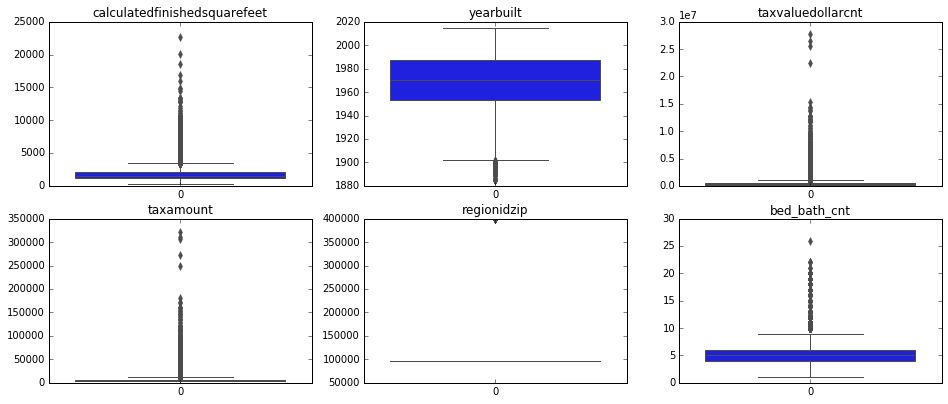

In [70]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount','regionidzip','bed_bath_cnt']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = x_vars_cols[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
#     ax.set(xscale='log', yscale='log')
    sns.boxplot(data=series)
    hspace = 0.2


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

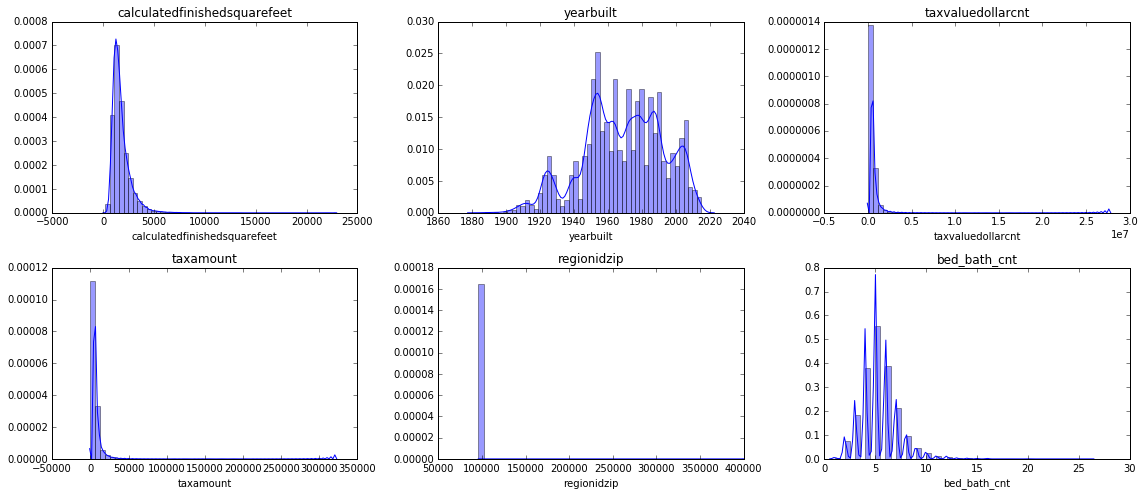

In [71]:
import matplotlib as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

for i, col in enumerate(['calculatedfinishedsquarefeet','yearbuilt','taxvaluedollarcnt','taxamount','regionidzip','bed_bath_cnt']):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = x_vars_cols[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    plt.tight_layout()
    sns.distplot(series)


In [72]:
df_cleaned

,parcelid,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
0,11016594,0.000762,3.0,1684.0,2.0,1959.0,360170.0,6735.88,96370.0,5.0
1,14366692,0.028359,4.0,2263.0,3.0,2014.0,585529.0,10153.02,96962.0,7.0
2,12098116,0.000016,2.0,2217.0,3.0,1940.0,119906.0,11484.48,96293.0,5.0
3,12643413,0.000475,2.0,839.0,2.0,1987.0,244880.0,3048.74,96222.0,4.0
4,14432541,0.000025,4.0,2283.0,2.0,1981.0,434551.0,5488.96,96961.0,6.0
5,11509835,0.073170,4.0,3067.0,4.0,1982.0,2447951.0,27126.57,96109.0,8.0
6,12286022,0.001936,2.0,1297.0,1.0,1939.0,111521.0,2304.97,96091.0,3.0
7,17177301,0.026830,3.0,1763.0,2.0,1994.0,306000.0,3745.50,97101.0,5.0
8,14739064,0.000009,2.0,796.0,1.0,1984.0,210064.0,2172.88,96987.0,3.0
9,14677559,0.007106,2.0,1260.0,2.0,1977.0,190960.0,1940.26,96963.0,4.0


#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

<h1>Exploration</h1>
<p><ol><li>Split data into training and test datasets</li>
<li>Address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.</li>
<li>Create a jointplot for each independent variable (normalized version) with the dependent variable. Use your for loop created in the exercises to run through the plotting of each independent variable. Be sure you have Pearson's r and p-value annotated on each plot.</li>
<li>Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). You will want to use the normalized dataframe so you can more clearly view the interactions.</li>
<li>Create a heatmap of the correlation between each variable pair.</li>
<li>Summarize your conclusions from these steps.</li>
<li>Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? Run a t-test to test this difference.</li>
<li>Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)</li></ol></p>


In [73]:
# test_train_split
X = df_cleaned.drop(['parcelid'], axis=1)
y = df_cleaned[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)



In [119]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [120]:
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'regionidzip', 'bed_bath_cnt', 'logerror']
Train dimensions (rows, columns): (70993, 10)


In [121]:
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['logerror', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'regionidzip', 'bed_bath_cnt', 'logerror']
Test dimensions (rows, columns): (17749, 10)


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

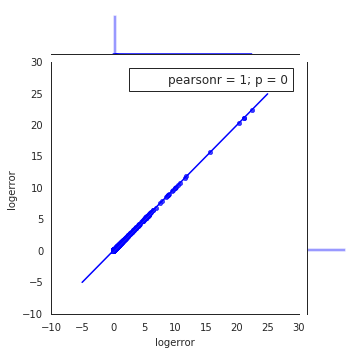

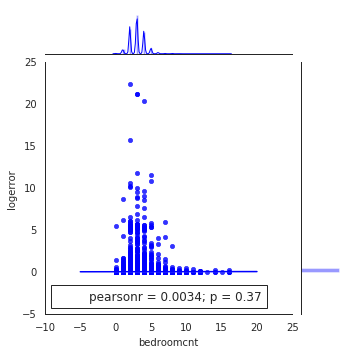

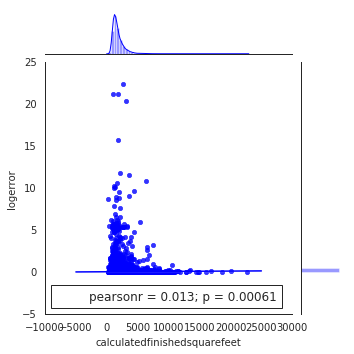

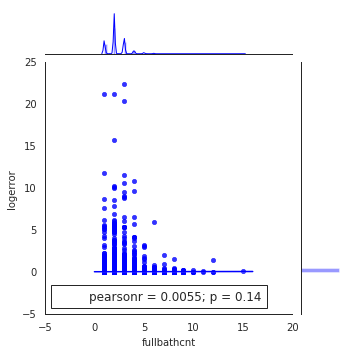

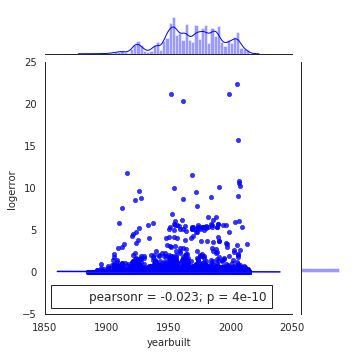

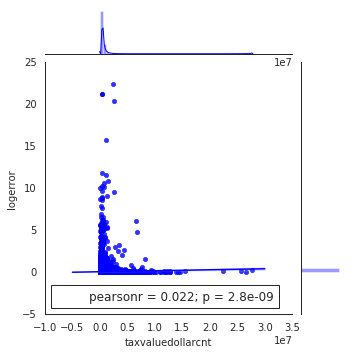

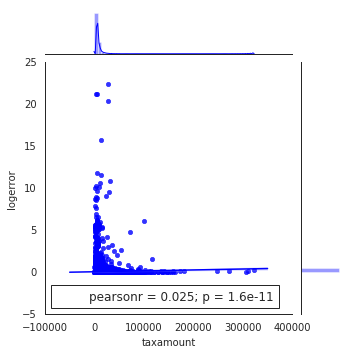

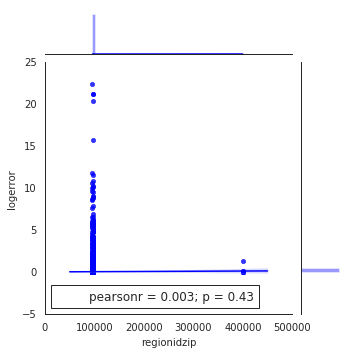

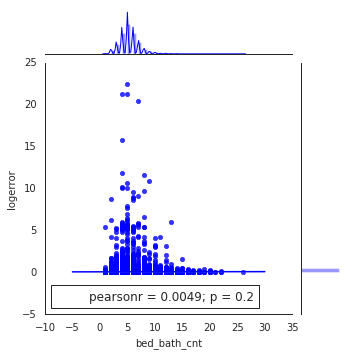

In [74]:
for col in X_train:
    with sns.axes_style('white'):
        j = sns.jointplot(col, 'logerror', data=X_train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
plt.show()

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1c2c61fef0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


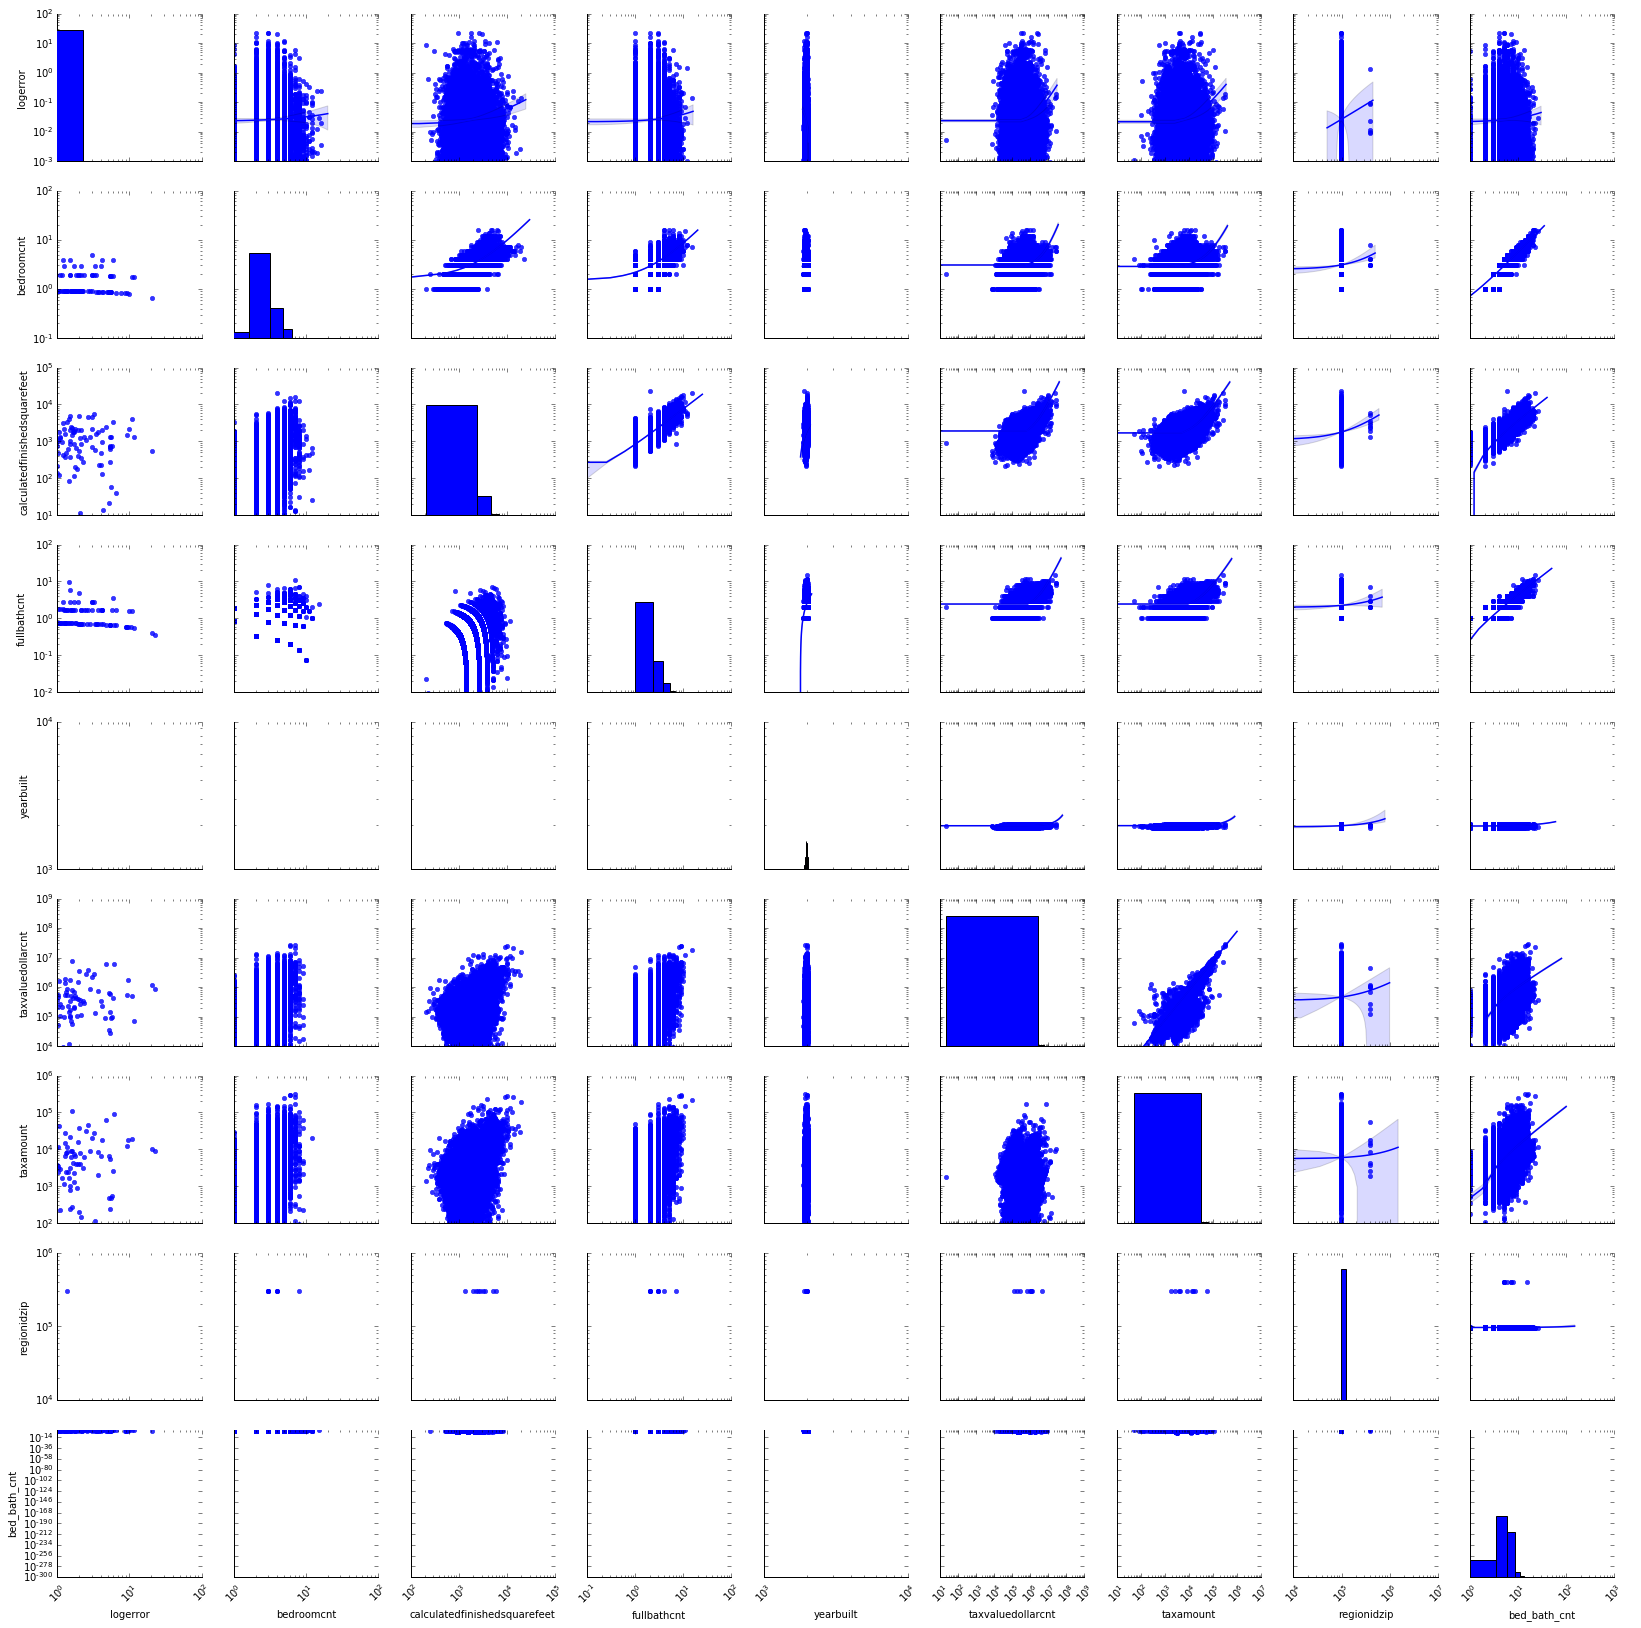

In [75]:
g = sns.PairGrid(X_train)
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat:
    ax.set(xscale='log', yscale='log')
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

In [ ]:
# g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin") 
# g.map_upper(sns.regplot) 
# g.map_lower(sns.residplot) 
# g.map_diag(plt.hist) 
# for ax in g.axes.flat: 
#     plt.setp(ax.get_xticklabels(), rotation=45) 
# g.add_legend() 
# g.set(alpha=0.5)

#### Create a heatmap of the correlation between each variable pair.

<Figure size 2880x2880 with 0 Axes>

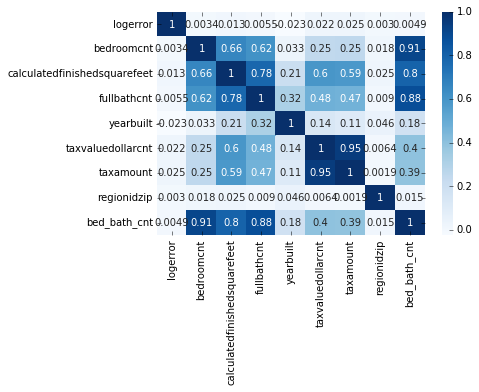

<Figure size 2880x2880 with 0 Axes>

In [76]:
sns.heatmap(X_train.corr(),cmap='Blues', annot=True)
plt.figure(figsize=(40, 40))


#### Summarize your conclusions from all of these steps.  

### When analyzing the variables relationships between the logerror and the other variables, there is no strong relationship between any single variable and the logerror.
### There are some expected relationships between variables like square footage and bedroom count. But this is not useful.

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [77]:
df_3_bd = X_train[X_train['bedroomcnt']==3.0]

In [78]:
df_5_bd = X_train[X_train['bedroomcnt']>5.0]

In [79]:
(df_3_bd)

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
52365,0.000408,3.0,1416.0,3.0,1988.0,200413.0,2462.21,96008.0,6.0
73132,0.000146,3.0,1868.0,2.0,1986.0,208828.0,3310.11,97319.0,5.0
50318,0.000064,3.0,1365.0,2.0,1961.0,286890.0,3761.25,96465.0,5.0
74000,0.000172,3.0,1284.0,2.0,1977.0,231817.0,2889.62,97004.0,5.0
77614,0.000081,3.0,1500.0,3.0,2009.0,580970.0,7177.18,96449.0,6.0
33349,0.001858,3.0,1240.0,2.0,1955.0,229920.0,3964.69,96083.0,5.0
13234,0.000876,3.0,1032.0,2.0,1959.0,319799.0,3994.76,96282.0,5.0
37917,0.000562,3.0,1338.0,2.0,1979.0,378228.0,3955.96,96385.0,5.0
38822,0.017398,3.0,1700.0,2.0,2005.0,509990.0,8457.40,96998.0,5.0
42857,0.122500,3.0,2454.0,2.0,1957.0,540588.0,6800.71,96370.0,5.0


In [80]:
(df_5_bd)

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
67980,0.000660,6.0,1764.0,3.0,1919.0,186591.0,2443.46,96221.0,9.0
77780,0.017876,6.0,7164.0,7.0,2001.0,1931699.0,23914.20,96058.0,13.0
75633,0.000049,6.0,3673.0,5.0,1941.0,1926268.0,23572.45,96120.0,11.0
5313,0.002025,6.0,6158.0,6.0,1990.0,1461801.0,17036.32,96337.0,12.0
29084,0.042849,6.0,6187.0,4.0,1927.0,3977921.0,48817.73,95985.0,10.0
51042,0.017822,8.0,4764.0,4.0,1950.0,1130000.0,15256.24,96000.0,12.0
19258,0.026569,8.0,3600.0,7.0,1925.0,525409.0,6788.41,96291.0,15.0
45156,0.015826,6.0,5564.0,7.0,1998.0,2151333.0,25670.87,96116.0,13.0
28478,0.004706,6.0,2200.0,3.0,1923.0,318348.0,4061.59,96221.0,9.0
23105,0.002200,6.0,3119.0,3.0,2006.0,341193.0,4338.93,97319.0,9.0


In [81]:
stats.ttest_ind(df_5_bd['logerror'],df_3_bd['logerror'])

Ttest_indResult(statistic=3.7370598258299323, pvalue=0.00018653399901761612)

In [82]:
len(X_train[X_train['yearbuilt']<1950])

13418

## The t test shows that the difference between the logerror's of the homes with 3 bdrms and homes with 5+ bdrms is 4.5X different. The p-value is very close to 0, so it is dependable. However, the difference is big.

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

### Two samples to compare: Home built before 1920 (not inc.) and Homes built after 1920

In [83]:
df_pre_1920 = X_train[X_train['yearbuilt']<1920]

In [88]:
df_post_1920 = X_train[X_train['yearbuilt']>=1920]

In [89]:
len(df_pre_1920)

1413

In [90]:
df_pre_1920.sort_values(by=['yearbuilt'])

,logerror,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,regionidzip,bed_bath_cnt
39187,0.001056,2.0,736.0,1.0,1885.0,233500.0,2123.25,95992.0,3.0
22073,0.012056,2.0,969.0,1.0,1885.0,29730.0,575.35,96292.0,3.0
57017,0.014933,6.0,2953.0,3.0,1885.0,529254.0,6899.32,95996.0,9.0
12855,0.000000,2.0,1465.0,1.0,1885.0,37273.0,631.00,96486.0,3.0
80820,0.000001,2.0,920.0,1.0,1886.0,31370.0,421.90,96221.0,3.0
29777,0.000064,4.0,2426.0,2.0,1887.0,287200.0,4377.48,96273.0,6.0
10374,0.001665,5.0,2886.0,3.0,1888.0,912000.0,12156.98,96273.0,8.0
86426,0.009526,4.0,2588.0,1.0,1888.0,426651.0,5423.32,96014.0,5.0
54335,0.003446,8.0,4946.0,4.0,1890.0,902756.0,11379.88,95999.0,12.0
47576,0.000317,5.0,1824.0,2.0,1890.0,228039.0,2846.89,96494.0,7.0


In [91]:
stats.ttest_ind(df_pre_1920['logerror'],df_post_1920['logerror'])

Ttest_indResult(statistic=5.491263367768839, pvalue=4.004321617162842e-08)

#### The t test shows that the difference between the logerror's of the homes built before 1920 and after 1920 is 5.49X different, which means they are not similar. The p-value is very close to 0, so it is dependable.

In [94]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


<h1>Modeling</h1>
<h2>Feature Engineering & Selection</h2>

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 
## Combine fullbathcnt and bedroomcnt = bedandbathcnt

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

## The OLS summary shows that all of the variables except bed_bath_cnt, regionidzip, and tax amount have low t-test results.


In [92]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.021e+28
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:23:17   Log-Likelihood:             2.0149e+06
No. Observations:               70993   AIC:                        -4.030e+06
Df Residuals:                   70985   BIC:                        -4.030e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
logerror                         1.0000   1.45e-15   6.91e+14      0.000       1.000       1.000
bedroomcnt                   -1.155e-11    4.8e-16   -2.4e+04      0.000   -1.15e-11   -1.15e-11
calculatedfinishedsquarefeet -9.591e-17   9.04e-19   -106.090      0.000   -9.77e-17   -9.41e-17
fullbathcnt                  -1.155e-11   5.62e-16  -2.06e+04      0.000   -1.15e-11   -1.15e-11
yearbuilt                     -7.07e-17   5.98e-18    -11.831      0.000   -8.24e-17    -5.9e-17
taxvaluedollarcnt            -6.595e-20   2.53e-21    -26.087      0.000   -7.09e-20    -6.1e-20
taxamount                     3.642e-18   2.02e-19     18.039      0.000    3.25e-18    4.04e-18
regionidzip                   2.678e-18   1.21e-19     22.183      0.000    2.44e-18    2.91e-18
bed_bath_cnt                  1.155e-11   2.71e-16   4.26e+04      0.000    1.15e-11    1.15e-11
==============================================================================
Omnibus:                    52504.115   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2126115.401
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      29.062   Cond. No.                     2.00e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)


## I will compare two measures of the size of the property: the bed_bath_cnt variable that I created vs calculatedfinishedsquarefeet.

## I will compare the taxamount to the taxvalueassessed.


##<s> I will compare the regionidzip to a latitude, longitude variable.

## In all of these comparisons I will analyze which measure perform WORSE. And then recommend dropping or additionally engineering those POOR PERFOMING variables.

<h1>Modeling</h1>

### Train & Test Model

### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training


In [96]:
# Create linear regression objects for SIZE FEATURES;
# lm1: bed_bath_cnt ONLY
# lm2: calculatedfinishedsquarefeet ONLY
# lm3: both bed_bath_cnt AND calculatedfinishedsquarefeet
lm1_size = LinearRegression(fit_intercept=True,)
lm2_size = LinearRegression(fit_intercept=True,)
lm3_size = LinearRegression(fit_intercept=True,)

In [123]:
# FIT/TRAIN THE MODEL
lm1_size.fit(X_train[['bed_bath_cnt']], y_train)
lm2_size.fit(X_train[['calculatedfinishedsquarefeet']], y_train)
lm3_size.fit(X_train[['bed_bath_cnt', 'calculatedfinishedsquarefeet']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
print('Univariate - bed_bath_cnt ONLY: logerror = b + m * bed_bath_cnt')
print('    y-intercept (b): {:5.2f}'.format(lm1_size.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1_size.coef_[0][0]))
print()
print('Univariate - calculatedfinishedsquarefeet ONLY: logerror = b + m * calculatedfinishedsquarefeet')
print('    y-intercept (b): {:5.2f}'.format(lm2_size.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm2_size.coef_[0][0]))
print()
print('Multivariate - bed_bath_cnt AND calculatedfinishedsquarefeet: logerror = b + m1 * bed_bath_cnt + m2 * calculatedfinishedsquarefeet')
print('    y-intercept  (b): {:5.2f}'.format(lm3_size.intercept_[0]))
print('    coefficient (m1): {:5.2f}'.format(lm3_size.coef_[0][0]))
print('    coefficient (m2): {:5.2f}'.format(lm3_size.coef_[0][1]))

Univariate - bed_bath_cnt ONLY: logerror = b + m * bed_bath_cnt
    y-intercept (b):  0.02
    coefficient (m):  0.00

Univariate - calculatedfinishedsquarefeet ONLY: logerror = b + m * calculatedfinishedsquarefeet
    y-intercept (b):  0.02
    coefficient (m):  0.00

Multivariate - bed_bath_cnt AND calculatedfinishedsquarefeet: logerror = b + m1 * bed_bath_cnt + m2 * calculatedfinishedsquarefeet
    y-intercept  (b):  0.02
    coefficient (m1): -0.00
    coefficient (m2):  0.00


In [105]:
y_pred_lm1_size = lm1_size.predict(X_train[['bed_bath_cnt']])
y_pred_lm2_size = lm2_size.predict(X_train[['calculatedfinishedsquarefeet']])
y_pred_lm3_size = lm3_size.predict(X_train[['bed_bath_cnt','calculatedfinishedsquarefeet']])


In [101]:
# Create linear regression objects for PRICE FEATURES;
# lm1: taxvaluedollarcnt ONLY
# lm2: taxamount ONLY
# lm3: both taxvaluedollarcnt AND taxamount
lm1_price = LinearRegression(fit_intercept=True,)
lm2_price = LinearRegression(fit_intercept=True,)
lm3_price = LinearRegression(fit_intercept=True,)

In [113]:
# FIT/TRAIN THE MODEL
lm1_price.fit(X_train[['taxvaluedollarcnt']], y_train)
lm2_price.fit(X_train[['taxamount']], y_train)
lm3_price.fit(X_train[['taxvaluedollarcnt', 'taxamount']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
print('Univariate - taxvaluedollarcnt ONLY: logerror = b + m * taxvaluedollarcnt')
print('    y-intercept (b): {:5.2f}'.format(lm1_price.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm1_price.coef_[0][0]))
print()
print('Univariate - taxamount ONLY: logerror = b + m * taxamount')
print('    y-intercept (b): {:5.2f}'.format(lm2_price.intercept_[0]))
print('    coefficient (m): {:5.2f}'.format(lm2_price.coef_[0][0]))
print()
print('Multivariate - taxvaluedollarcnt AND taxamount: logerror = b + m1 * taxvaluedollarcnt + m2 * taxamount')
print('    y-intercept  (b): {:5.2f}'.format(lm3_price.intercept_[0]))
print('    coefficient (m1): {:5.2f}'.format(lm3_price.coef_[0][0]))
print('    coefficient (m2): {:5.2f}'.format(lm3_price.coef_[0][1]))

Univariate - taxvaluedollarcnt ONLY: logerror = b + m * taxvaluedollarcnt
    y-intercept (b):  0.02
    coefficient (m):  0.00

Univariate - taxamount ONLY: logerror = b + m * taxamount
    y-intercept (b):  0.02
    coefficient (m):  0.00

Multivariate - taxvaluedollarcnt AND taxamount: logerror = b + m1 * taxvaluedollarcnt + m2 * taxamount
    y-intercept  (b):  0.02
    coefficient (m1): -0.00
    coefficient (m2):  0.00


In [115]:
y_pred_lm1_price = lm1_price.predict(X_train[['taxvaluedollarcnt']])
y_pred_lm2_price = lm2_price.predict(X_train[['taxamount']])
y_pred_lm3_price = lm3_price.predict(X_train[['taxvaluedollarcnt','taxamount']])


In [99]:
# Create linear regression objects for GEOGRAPHIC/LOCATION FEATURES;
# lm1:  ONLY
# lm2:  ONLY
# lm3: both  AND 
lm1_loc = LinearRegression(fit_intercept=True,)
lm2_loc = LinearRegression(fit_intercept=True,)
lm3_loc = LinearRegression(fit_intercept=True,)

In [ ]:
# FIT/TRAIN THE MODEL
lm1_loc.fit(X_train[['taxvaluedollarcnt']], y_train)
lm2_loc.fit(X_train[['taxamount']], y_train)
lm3_loc.fit(X_train[['taxvaluedollarcnt', 'taxamount']], y_train)

### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

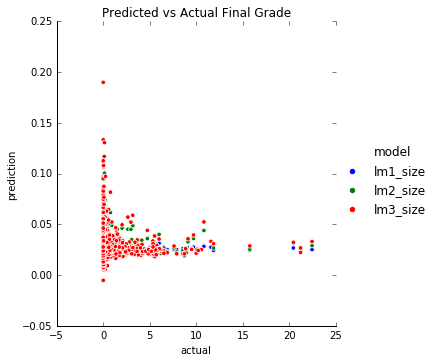

In [109]:
# THE ANALYSIS OF THE SIZE FEATURES

pd.DataFrame({'actual': y_train.logerror,
              'lm1_size': y_pred_lm1_size.ravel(),
              'lm2_size': y_pred_lm2_size.ravel(),
             'lm3_size': y_pred_lm3_size.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.autoscale(enable=True, axis='both', tight=None)
plt.title('Predicted vs Actual Final Grade')

In [125]:
mse_lm1_size = mean_squared_error(y_train, y_pred_lm1_size)
print("lm1\n  mse: {:.3}".format(mse_lm1_size)) 

r2_lm1_size = r2_score(y_train, y_pred_lm1_size)
print('  {:.2%} of the variance in the logerror can be explained by the bed_bath_cnt.'.format(r2_lm1_size))

mse_lm2_size = mean_squared_error(y_train, y_pred_lm2_size)
print("lm2\n  mse: {:.3}".format(mse_lm2_size)) 

r2_lm2_size = r2_score(y_train, y_pred_lm2_size)
print('  {:.2%} of the variance in the logerror can be explained by the calculatedfinishedsquarefeet.'.format(r2_lm2_size))

mse_lm3_size = mean_squared_error(y_train, y_pred_lm3_size)
print("lm2\n  mse: {:.3}".format(mse_lm3_size)) 

r2_lm3_size = r2_score(y_train, y_pred_lm3_size)
print('  {:.2%} of the variance in the logerror can be explained by the bed_bath_cnt and calculatedfinishedsquarefeet.'.format(r2_lm3_size))

lm1
  mse: 0.0878
  0.00% of the variance in the logerror can be explained by the bed_bath_cnt.
lm2
  mse: 0.0878
  0.02% of the variance in the logerror can be explained by the calculatedfinishedsquarefeet.
lm2
  mse: 0.0877
  0.02% of the variance in the logerror can be explained by the bed_bath_cnt and calculatedfinishedsquarefeet.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

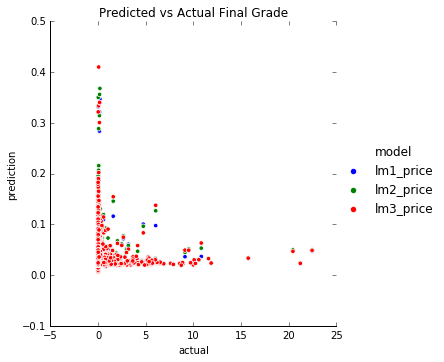

In [116]:
# THE ANALYSIS OF THE PRICE FEATURES

pd.DataFrame({'actual': y_train.logerror,
              'lm1_price': y_pred_lm1_price.ravel(),
              'lm2_price': y_pred_lm2_price.ravel(),
             'lm3_price': y_pred_lm3_price.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.autoscale(enable=True, axis='both', tight=None)
plt.title('Predicted vs Actual Final Grade')

In [127]:
mse_lm1_price = mean_squared_error(y_train, y_pred_lm1_price)
print("lm1\n  mse: {:.3}".format(mse_lm1_size)) 

r2_lm1_price = r2_score(y_train, y_pred_lm1_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxvaluedollarcnt.'.format(r2_lm1_price))

mse_lm2_price = mean_squared_error(y_train, y_pred_lm2_price)
print("lm2\n  mse: {:.3}".format(mse_lm2_price)) 

r2_lm2_price = r2_score(y_train, y_pred_lm2_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxamount.'.format(r2_lm2_price))


mse_lm3_price = mean_squared_error(y_train, y_pred_lm3_price)
print("lm2\n  mse: {:.3}".format(mse_lm3_size)) 

r2_lm3_price = r2_score(y_train, y_pred_lm3_price)
print('  {:.2%} of the variance in the logerror can be explained by the taxvaluedollarcnt and taxamount.'.format(r2_lm3_price))

lm1
  mse: 0.0878
  0.05% of the variance in the logerror can be explained by the taxvaluedollarcnt.
lm2
  mse: 0.0877
  0.06% of the variance in the logerror can be explained by the taxamount.
lm2
  mse: 0.0877
  0.07% of the variance in the logerror can be explained by the taxvaluedollarcnt and taxamount.


In [132]:
len(y_pred_lm2_size)

70993

In [129]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17749 entries, 30311 to 13688
Data columns (total 1 columns):
logerror    17749 non-null float64
dtypes: float64(1)
memory usage: 277.3 KB



## Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [138]:
sns.residplot(y_pred_lm1_size, (y_pred_lm1_size - y_test), c='g')
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

ValueError: operands could not be broadcast together with shapes (70993,1) (17749,1) 